In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import importlib
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

In [2]:
from plot import *
from fit import *

In [3]:
figure_folder = "figures_thesis2/"

## No Syst

In [4]:
path = "/home/centos/mount_point/data/nosyst_loss/train/bce/"
val_loss_bce = np.load(path + "val_loss.npy")
train_loss_bce = np.load(path + "train_loss.npy")

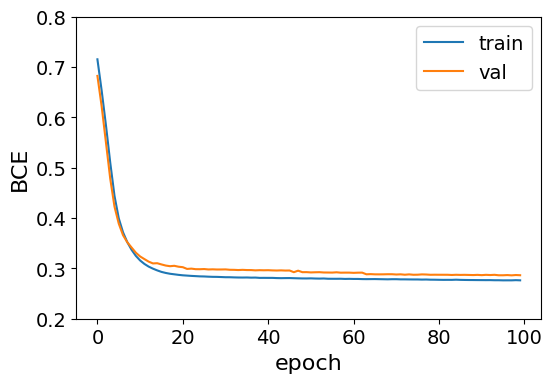

In [5]:
plt.figure(dpi=100)#dpi=150)
plt.plot(train_loss_bce, label="train")
plt.plot(val_loss_bce, label="val")
plt.ylabel(r"BCE", size=16)
plt.xlabel(r"epoch", size=16)
plt.ylim([0.2, 0.8])
plt.legend(loc="upper right", prop={'size': 14})
plt.savefig(figure_folder + "loss_bce.pdf", bbox_inches="tight")
plt.show()

In [6]:
path = "/home/centos/mount_point/data/artificial_experiments/nosyst/train/"
cov_bce = np.load(path + "bce/val_cov.npy").squeeze()
inf_bce = np.load(path + "inferno/val_cov.npy").squeeze()

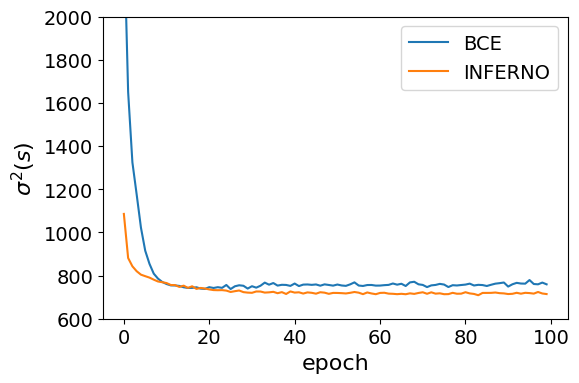

In [7]:
plt.figure(dpi=100)#dpi=150)
plt.plot(cov_bce, label="BCE")
plt.plot(inf_bce, label="INFERNO")
plt.ylabel(r"$\sigma^2(s)$", size=16)
plt.xlabel(r"epoch", size=16)
plt.ylim([600, 2000])
plt.legend(loc="upper right", prop={'size': 14})
plt.savefig(figure_folder + "loss_nosyst.pdf", bbox_inches="tight")
plt.show()

In [4]:
bkg = pd.read_hdf("/home/centos/mount_point/data/artificial_experiments/nosyst/samples/QCD.h5")
sig = pd.read_hdf("/home/centos/mount_point/data/artificial_experiments/nosyst/samples/TTJets_signal.h5")

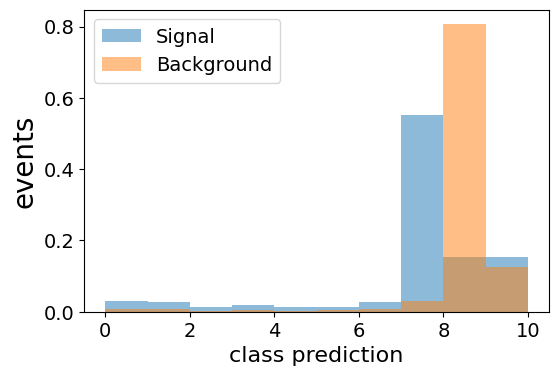

In [5]:
val_bkg = bkg[bkg["is_train"]==False]["inferno"]
val_sig = sig[sig["is_train"]==False]["inferno"]
plt.figure(dpi=100)#dpi=150)
plt.hist(val_sig, density=True, alpha=0.5, bins=10, range=[0,10], label="Signal")
plt.hist(val_bkg, density=True, alpha=0.5, bins=10, range=[0,10], label="Background")
plt.xlabel("class prediction", fontsize=16)
plt.ylabel(r"events", fontsize=20)
plt.legend(loc="upper left", prop={'size': 14})
plt.savefig(figure_folder + "inferno_output.pdf", bbox_inches="tight")

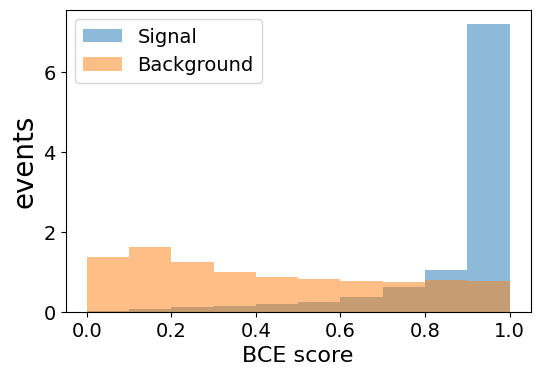

In [7]:
val_bkg = bkg[bkg["is_train"]==False]["bce"]
val_sig = sig[sig["is_train"]==False]["bce"]
plt.figure(dpi=100)#dpi=150)
plt.hist(val_sig, density=True, alpha=0.5, bins=10, range=[0,1], label="Signal")
plt.hist(val_bkg, density=True, alpha=0.5, bins=10, range=[0,1], label="Background")
plt.xlabel("BCE score", fontsize=16)
plt.ylabel(r"events", fontsize=20)
plt.legend(loc="upper left", prop={'size': 14})
plt.savefig(figure_folder + "bce_output.pdf", bbox_inches="tight")

In [23]:
path = "/home/centos/mount_point/data/artificial_experiments/nosyst/"
bce_asimov_scan = load_scan( path + "/fit/bce_asimov" )
inferno_asimov_scan = load_scan( path + "/fit/inferno_asimov")
bce_scan = load_scan( path + "/fit/bce" )
inferno_scan = load_scan( path + "/fit/inferno")

In [15]:
def nice_scan(bce, inferno, bce_stat = None, inferno_stat  = None, asimov = True, title = None, name = "llscan", range=[0.7,1.3]):
              
    plt.figure(dpi=100)#dpi=150)
    plt.plot(bce["parameter_values"], bce["delta_nlls"], label="BCE")
    plt.plot(inferno["parameter_values"], inferno["delta_nlls"], label="INFERNO")
    if bce_stat is not None:
        #plt.plot(bce_stat["parameter_values"], bce_stat["delta_nlls"], label="BCE Stat")
        plt.plot(inferno_stat["parameter_values"], inferno_stat["delta_nlls"], label="Stat only")    
    plt.ylim(0,5)
    plt.legend(loc="upper right", prop={'size': 13})
    plt.ylabel(r"$-2 \Delta \log(L)$", size=16)
    plt.xlabel(r'$\mu$', size=16)
    plt.xlim([range[0], range[1]])
    #plt.title("Comparison INFERNO - BCE")
    plt.axhline(y=1, linestyle="dashed", color="grey")
    plt.axhline(y=4, linestyle="dashed", color="grey")
    if title is not None:
        plt.title(title, size=25)
    plt.savefig(figure_folder + name + ".pdf", bbox_inches="tight")

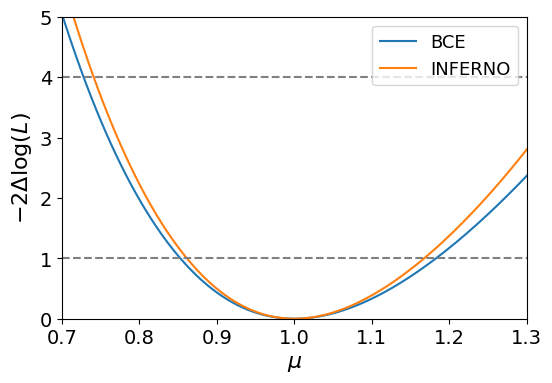

In [16]:
nice_scan(bce_asimov_scan, inferno_asimov_scan, asimov = True, name="ll_nosyst")

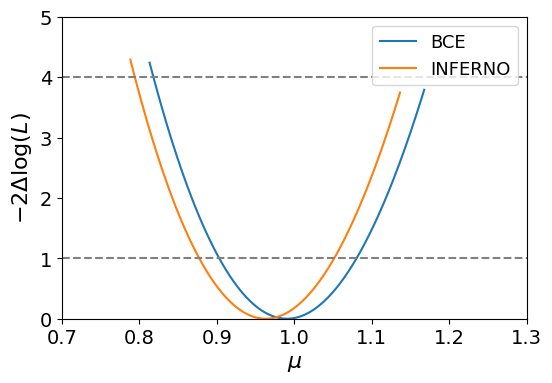

In [26]:
nice_scan(bce_scan, inferno_scan, asimov = True, name = "ll_nosyst_data")

## Differentiable hist

## Artificial syst

In [8]:
path = "/home/centos/mount_point/data/artificial_experiments/artificial_sigshift/shift_2/train/"
cov_bce = np.load(path + "bce/val_cov.npy").squeeze()
inf_bce = np.load(path + "inferno/val_cov.npy").squeeze()

In [29]:
def plot_cov_infbce(bce_covs, inf_covs, names, stddev=False, leg_size = 13, name = "cov"):

    bce_corrs = get_corr(bce_covs)
    inf_corrs = get_corr(inf_covs)    
    n_par = len(names)
    
    fig, ax = plt.subplots(nrows=n_par, ncols=n_par, figsize=(8,8), dpi=100)
    if n_par == 1: ax = [[ax]]
    
    for i, row in enumerate(ax):
        for j, col in enumerate(row):
            if i == j:
                bce = get_cov_entry(bce_covs, i, j)
                inf = get_cov_entry(inf_covs, i, j)
                if stddev == True:
                    bce = np.sqrt(bce)
                    inf = np.sqrt(inf)
                
                """
                col.text(0.8, 0.85, names[i],
                 horizontalalignment='center',
                 verticalalignment='center',
                 transform = col.transAxes, #size=15,
                 bbox=dict(facecolor='red', edgecolor=None, alpha=0.2))
                """
                
                if i==0:
                    #lims = (500,1500)
                    lims_low = np.min(inf) - 0.1 * np.min(inf)
                    lims_up = np.min(bce) + 0.5 * np.min(bce) 
                    lims = (lims_low, lims_up)
                    if stddev == True:
                        lims = np.sqrt(lims)
                else:
                    lims = (0., 1.5)
            else:
                bce = get_cov_entry(bce_corrs, i, j)
                inf = get_cov_entry(inf_corrs, i, j)
                lims = (-1., 1)
            col.plot(bce, label="BCE")
            col.plot(inf, label="INFERNO")
            col.set_ylim(lims)
            col.set_xlabel("epoch", size=16)
            if i == j:
                col.set_ylabel(r"$\sigma^2(" + names[i] + ")$", size=16)
            else:
                col.set_ylabel(r"$\rho(" + names[i] + "," + names[j] + ")$", size=16)
            if (i==0) & (j==n_par-1):
                col.legend(loc="upper right", prop={'size': leg_size})
                #col.legend(loc="upper right", prop={'size': 16})
    fig.tight_layout()   
    fig.savefig(figure_folder + name + ".pdf", bbox_inches="tight")
    plt.show()            


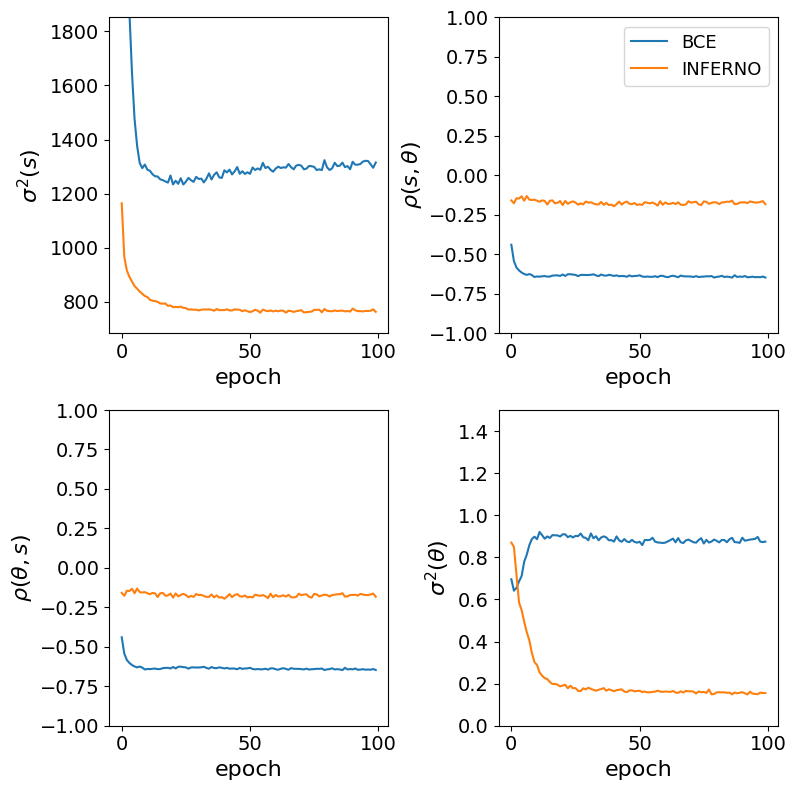

In [10]:
plot_cov_infbce(cov_bce, inf_bce, names = ["s", r"\theta"], stddev=False, name="cov_artsig")

In [11]:
path = "/home/centos/mount_point/data/artificial_experiments/artificial_sigshift/shift_2/"
bce_asimov_scan = load_scan( path + "/fit/bce_asimov" )
inferno_asimov_scan = load_scan( path + "/fit/inferno_asimov")
bce_scan = load_scan( path + "/fit/bce" )
inferno_scan = load_scan( path + "/fit/inferno")
bce_asimov_scan_stat = load_scan( path + "/fit/bce_asimov", name='mu_scan_stat' )
inferno_asimov_scan_stat = load_scan( path + "/fit/inferno_asimov", name='mu_scan_stat')

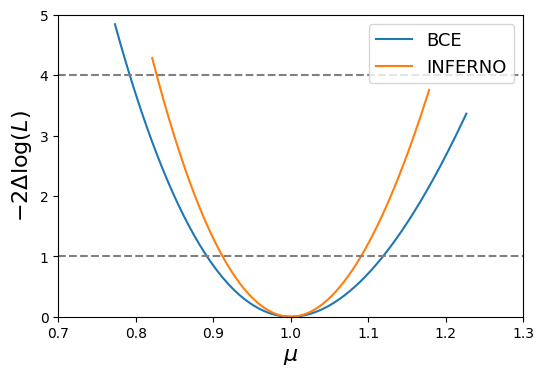

In [99]:
nice_scan(bce_asimov_scan, inferno_asimov_scan, asimov = True, name="llscan_artsig")

## Norm syst

In [12]:
path = "/home/centos/mount_point/data/artificial_experiments/artificial_signorm/norm_2/train/"
cov_bce = np.load(path + "bce/val_cov.npy").squeeze()
inf_bce = np.load(path + "inferno/val_cov.npy").squeeze()

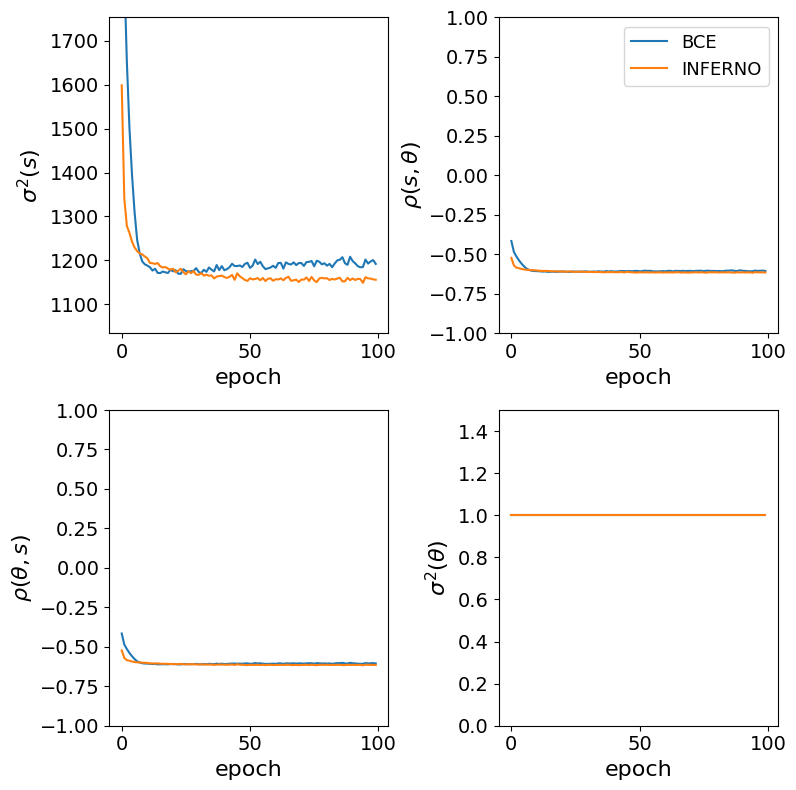

In [13]:
plot_cov_infbce(cov_bce, inf_bce, names = ["s", r"\theta"], stddev=False, name="cov_normsig")

## Two nuis

In [14]:
path = "/home/centos/mount_point/data/artificial_experiments/artificial_sigbkg/shift_0/train/"
cov_bce = np.load(path + "bce/val_cov.npy").squeeze()
inf_bce = np.load(path + "inferno/val_cov.npy").squeeze()

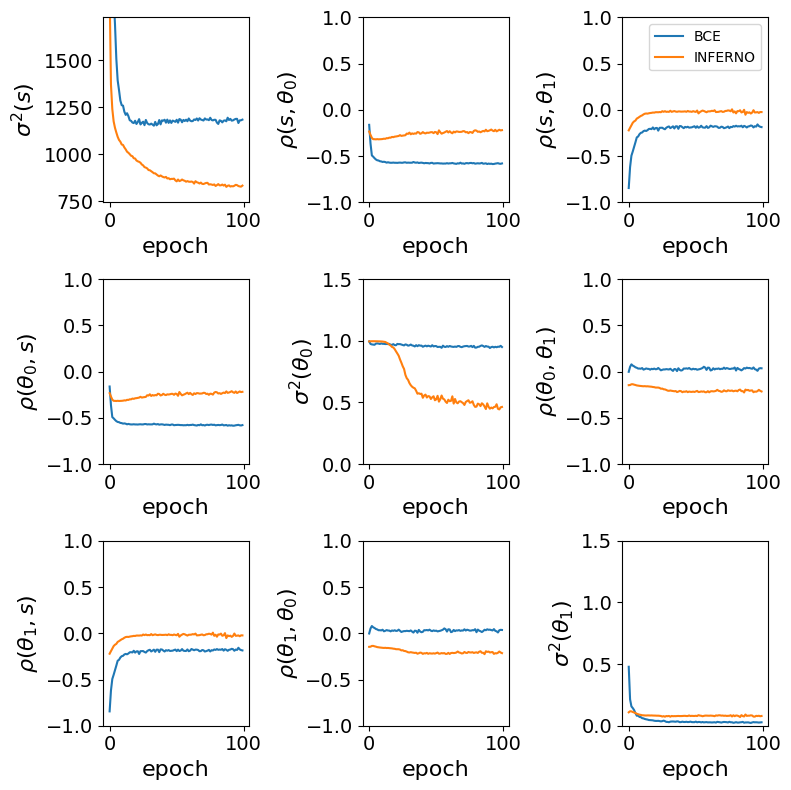

In [15]:
plot_cov_infbce(cov_bce, inf_bce, names = ["s", r"\theta_0", r"\theta_1"], stddev=False, leg_size=10, name="cov_bkgsig")

## Single JES syst

In [16]:
path = "/home/centos/mount_point/data/artificial_experiments/shape_syst/jes/train/"
cov_bce = np.load(path + "bce/val_cov.npy").squeeze()
inf_bce = np.load(path + "inferno/val_cov.npy").squeeze()

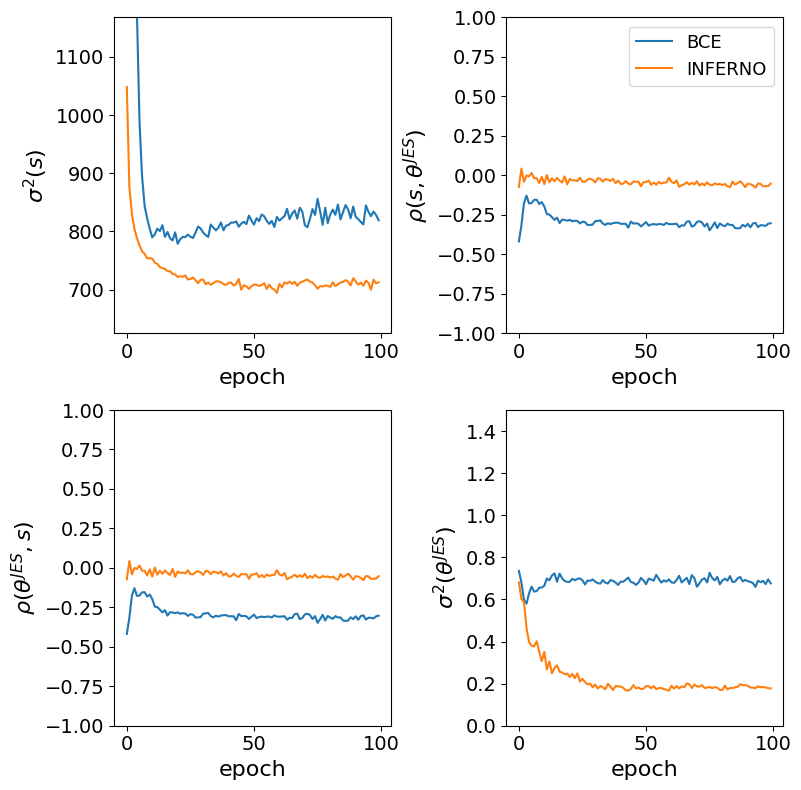

In [17]:
plot_cov_infbce(cov_bce, inf_bce, names = ["s", r"\theta^{JES}"], stddev=False, name="cov_jes")

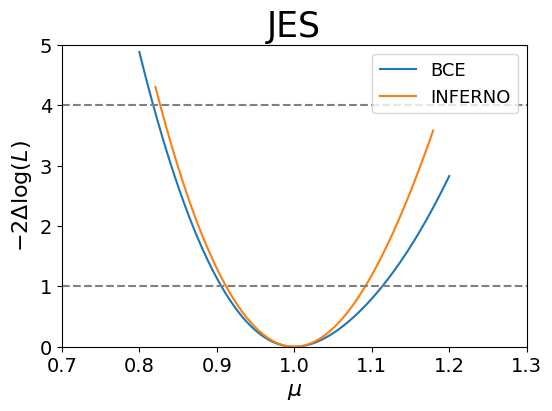

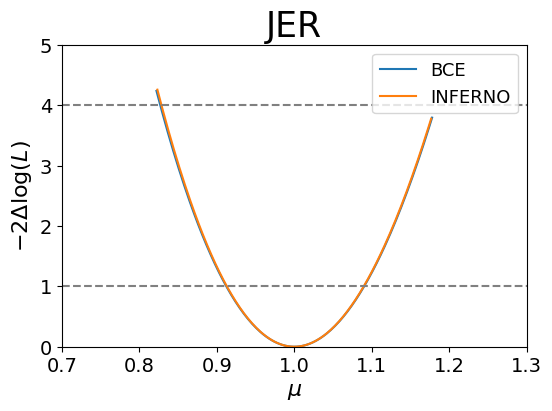

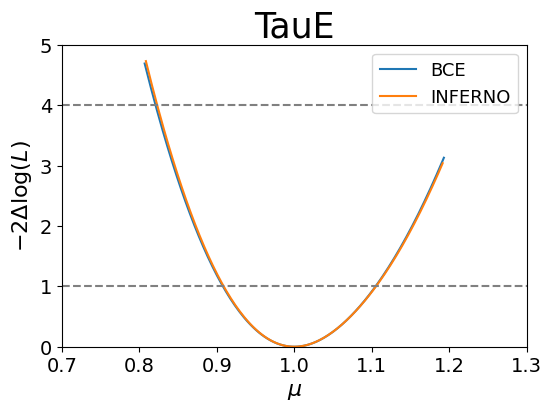

In [35]:
path = "/home/centos/mount_point/data/artificial_experiments/shape_syst/"
for s, t in zip(["jes", "jer", "taue"], ["JES", "JER", "TauE"]):
    bce_asimov_scan = load_scan( path + s + "/fit/bce_asimov" )
    inferno_asimov_scan = load_scan( path + s + "/fit/inferno_asimov")
    nice_scan(bce_asimov_scan, inferno_asimov_scan, asimov = True, title = t, name="llscan_" + s)

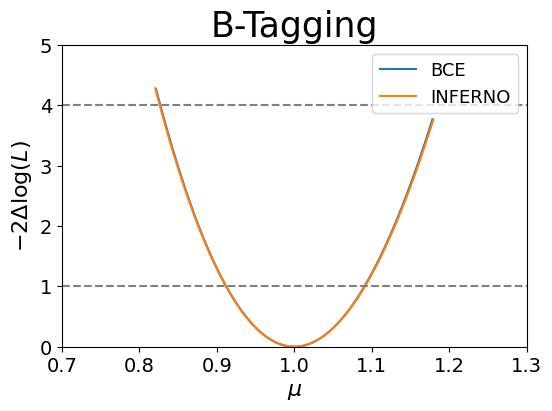

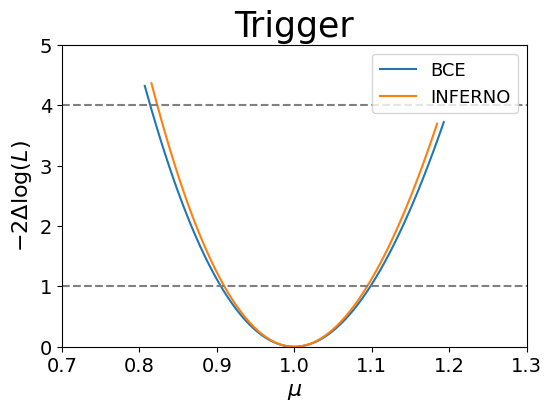

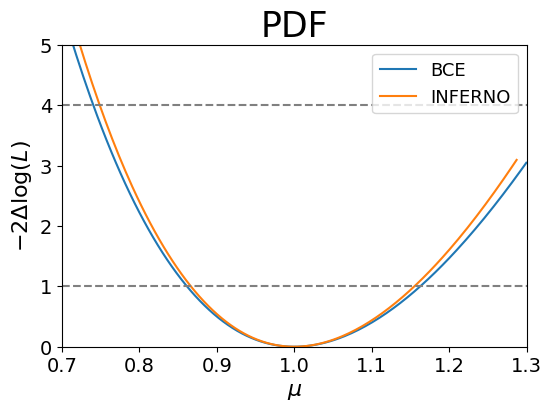

In [69]:
path = "/home/centos/mount_point/data/artificial_experiments/weight_syst/"
for s, t in zip(["btag", "trigger", "pdf"], ["B-Tagging", "Trigger", "PDF"]):
    bce_asimov_scan = load_scan( path + s + "/fit/bce_asimov" )
    inferno_asimov_scan = load_scan( path + s + "/fit/inferno_asimov")
    nice_scan(bce_asimov_scan, inferno_asimov_scan, asimov = True, title = t, name="llscan_" + s)

## Train with multiple

In [18]:
#path = "/home/centos/mount_point/data/artificial_experiments/most_impact/train/"
path = "/home/centos/mount_point/data/artificial_experiments/optimization_pdftauejes/run_47/train/"
cov_bce = np.load(path + "bce/val_cov.npy").squeeze()
inf_bce = np.load(path + "inferno/val_cov.npy").squeeze()

In [19]:
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 
def plot_cov_infbce(bce_covs, inf_covs, names, stddev=False, leg_size = 13, name = "cov"):

    bce_corrs = get_corr(bce_covs)
    inf_corrs = get_corr(inf_covs)    
    n_par = len(names)
    
    fig, ax = plt.subplots(nrows=n_par, ncols=n_par, figsize=(8,8), dpi=100)
    if n_par == 1: ax = [[ax]]
    
    for i, row in enumerate(ax):
        for j, col in enumerate(row):
            if i == j:
                bce = get_cov_entry(bce_covs, i, j)
                inf = get_cov_entry(inf_covs, i, j)
                if stddev == True:
                    bce = np.sqrt(bce)
                    inf = np.sqrt(inf)
                
                """
                col.text(0.8, 0.85, names[i],
                 horizontalalignment='center',
                 verticalalignment='center',
                 transform = col.transAxes, #size=15,
                 bbox=dict(facecolor='red', edgecolor=None, alpha=0.2))
                """
                
                if i==0:
                    #lims = (500,1500)
                    lims_low = np.min(inf) - 0.1 * np.min(inf)
                    lims_up = np.min(bce) + 0.5 * np.min(bce) 
                    lims = (lims_low, lims_up)
                    if stddev == True:
                        lims = np.sqrt(lims)
                else:
                    lims = (0., 1.5)
            else:
                bce = get_cov_entry(bce_corrs, i, j)
                inf = get_cov_entry(inf_corrs, i, j)
                lims = (-1., 1)
            col.plot(bce, label="BCE")
            col.plot(inf, label="INFERNO")
            col.set_ylim(lims)
            col.set_xlabel("epoch", size=10)
            if i == j:
                col.set_ylabel(r"$\sigma^2(" + names[i] + ")$", size=10)
            else:
                col.set_ylabel(r"$\rho(" + names[i] + "," + names[j] + ")$", size=10)
            if (i==0) & (j==n_par-1):
                col.legend(loc="upper right", prop={'size': leg_size})
                #col.legend(loc="upper right", prop={'size': 16})
    fig.tight_layout()   
    fig.savefig(figure_folder + name + ".pdf", bbox_inches="tight")
    plt.show()            


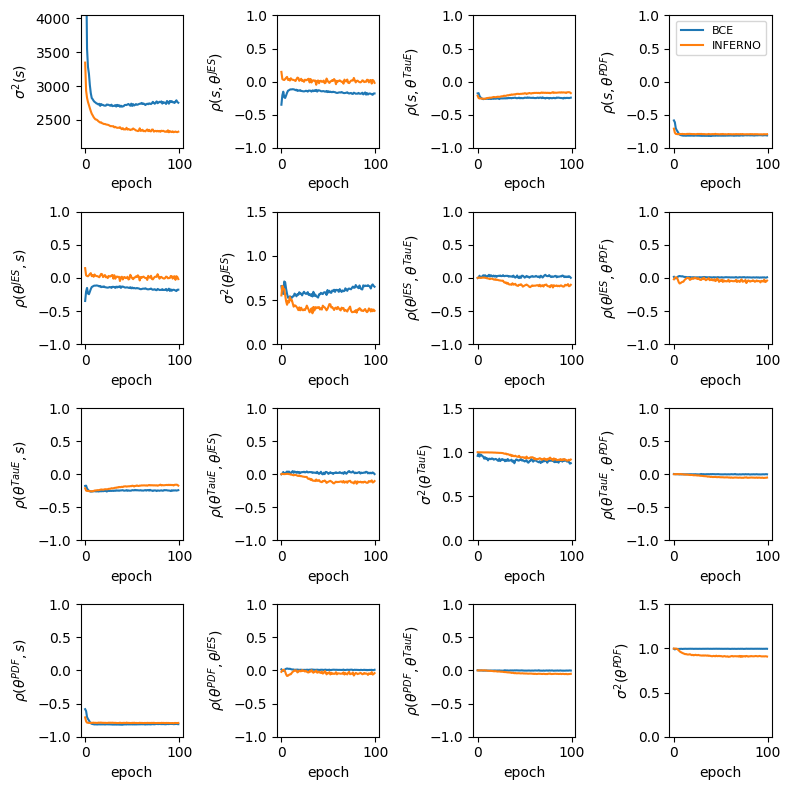

In [20]:
plot_cov_infbce(cov_bce, inf_bce, names = ["s", r"\theta^{JES}",  r"\theta^{TauE}",  r"\theta^{PDF}"], leg_size = 8, stddev=False, name="cov_impact")

In [73]:
#path = "/home/centos/mount_point/data/artificial_experiments/most_impact/"
bce_asimov_scan = load_scan( path + "/fit/bce_asimov" )
inferno_asimov_scan = load_scan( path + "/fit/inferno_asimov")
bce_scan = load_scan( path + "/fit/bce" )
inferno_scan = load_scan( path + "/fit/inferno")
bce_asimov_scan_stat = load_scan( path + "/fit/bce_asimov", name='mu_scan_stat' )
inferno_asimov_scan_stat = load_scan( path + "/fit/inferno_asimov", name='mu_scan_stat')

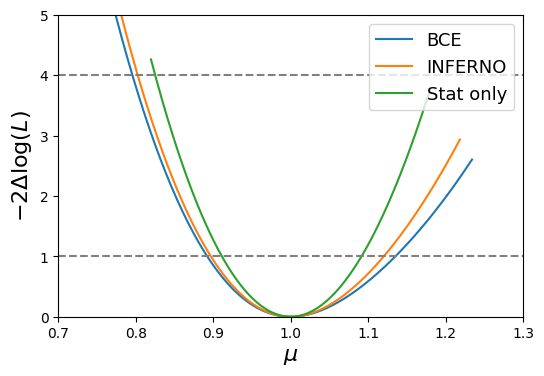

In [43]:
nice_scan(bce_asimov_scan, inferno_asimov_scan, bce_asimov_scan_stat, inferno_asimov_scan_stat, asimov = True, name="llscan_most_impact")


## Train with all

In [17]:
path = "/home/centos/mount_point/data/artificial_experiments/optimization_all/run_69/fit_final/"
bce_asimov_scan = load_scan( path + "/fit/bce_asimov" )
inferno_asimov_scan = load_scan( path + "/fit/inferno_asimov")
bce_scan = load_scan( path + "/fit/bce" )
inferno_scan = load_scan( path + "/fit/inferno")
bce_asimov_scan_stat = load_scan( path + "/fit/bce_asimov", name='mu_scan_stat' )
inferno_asimov_scan_stat = load_scan( path + "/fit/inferno_asimov", name='mu_scan_stat')

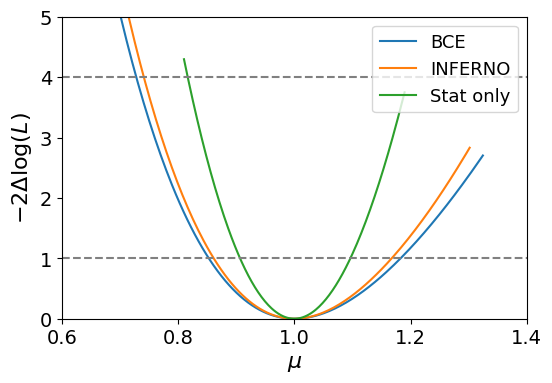

In [19]:
nice_scan(bce_asimov_scan, inferno_asimov_scan, bce_asimov_scan_stat, inferno_asimov_scan_stat, asimov = True, range=(0.6, 1.4), name="llscan_best")

## Final fit

In [103]:
path = "/home/centos/mount_point/data/artificial_experiments/optimization_all/run_69/fit_final_all/fit/"
bce_asimov_scan = load_scan( path + "bce_asimov" )
inferno_asimov_scan = load_scan( path + "inferno_asimov")
bce_scan = load_scan( path + "bce" )
inferno_scan = load_scan( path + "inferno")
bce_asimov_scan_stat = load_scan( path + "bce_asimov", name='mu_scan_stat' )
inferno_asimov_scan_stat = load_scan( path + "inferno_asimov", name='mu_scan_stat')
bce_scan_stat = load_scan( path + "bce", name='mu_scan_stat' )
inferno_scan_stat = load_scan( path + "inferno", name='mu_scan_stat')

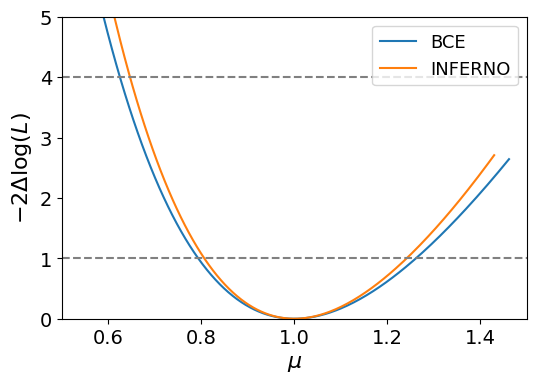

In [104]:
nice_scan(bce_asimov_scan, inferno_asimov_scan, range=(0.5, 1.5), asimov = True, name="llscan_all_asimov")

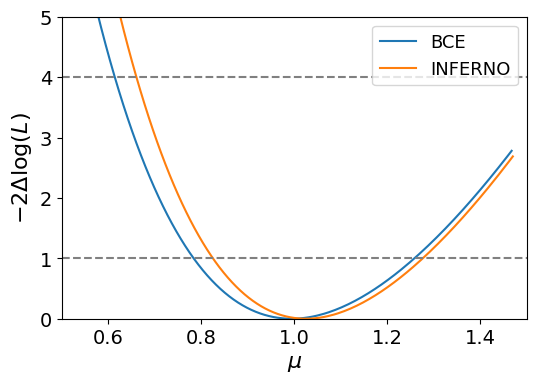

In [105]:
nice_scan(bce_scan, inferno_scan, range=(0.5, 1.5), asimov = True, name="llscan_all")

In [10]:
def nice_scan_bce(bce, bce_stat = None, asimov = True, title = None, name = "llscan", range=[0.7,1.3]):
              
    plt.figure(dpi=100)#dpi=150)
    plt.plot(bce["parameter_values"], bce["delta_nlls"], label="BCE")
    if bce_stat is not None:
        #plt.plot(bce_stat["parameter_values"], bce_stat["delta_nlls"], label="BCE Stat")
        plt.plot(bce_stat["parameter_values"], bce_stat["delta_nlls"], label="Stat only", color="green")    
    plt.ylim(0,5)
    plt.legend(loc="upper right", prop={'size': 13})
    plt.ylabel(r"$-2 \Delta \log(L)$", size=16)
    plt.xlabel(r'$\mu$', size=16)
    plt.xlim([range[0], range[1]])
    #plt.title("Comparison INFERNO - BCE")
    plt.axhline(y=1, linestyle="dashed", color="grey")
    plt.axhline(y=4, linestyle="dashed", color="grey")
    if title is not None:
        plt.title(title, size=25)
    plt.savefig(figure_folder + name + ".pdf", bbox_inches="tight")

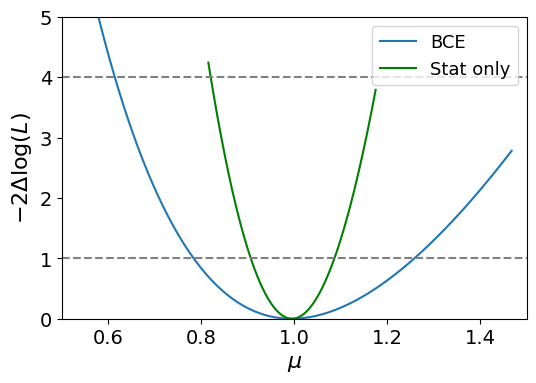

In [12]:
nice_scan_bce(bce_scan, bce_scan_stat, asimov = False, name="llscan_bce", range=[0.5,1.5])

## Pulls

In [86]:
path = "/home/centos/mount_point/data/artificial_experiments/optimization_all/run_69/"
bce_asimov = load_fitresults( path + "fit_final/fit/bce_asimov" )
inferno_asimov = load_fitresults( path + "fit_final/fit/inferno_asimov")

In [36]:
def pulls(bestfit, uncertainty, labels):
    
    num_pars = len(bestfit)
    y_positions = np.arange(num_pars)[::-1]
    fig, ax = plt.subplots(figsize=(6, 1 + num_pars / 4), dpi=100)
    ax.errorbar(bestfit, y_positions, xerr=uncertainty, fmt="o", color="black")

    ax.fill_between([-2, 2], -0.5, len(bestfit) - 0.5, color="yellow")
    ax.fill_between([-1, 1], -0.5, len(bestfit) - 0.5, color="limegreen")
    ax.vlines(0, -0.5, len(bestfit) - 0.5, linestyles="dotted", color="black")

    ax.set_xlim([-3, 3])
    ax.set_xlabel(r"$\left(\hat{\theta} - \theta_0\right) / \Delta \theta$")
    ax.set_ylim([-0.5, num_pars - 0.5])
    ax.set_yticks(y_positions)
    ax.set_yticklabels(labels)
    ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())  # minor ticks
    ax.tick_params(axis="both", which="major", pad=8)
    ax.tick_params(direction="in", top=True, right=True, which="both")
    fig.set_tight_layout(True)

    #utils._save_and_close(fig, figure_path, close_figure)
    plt.show()

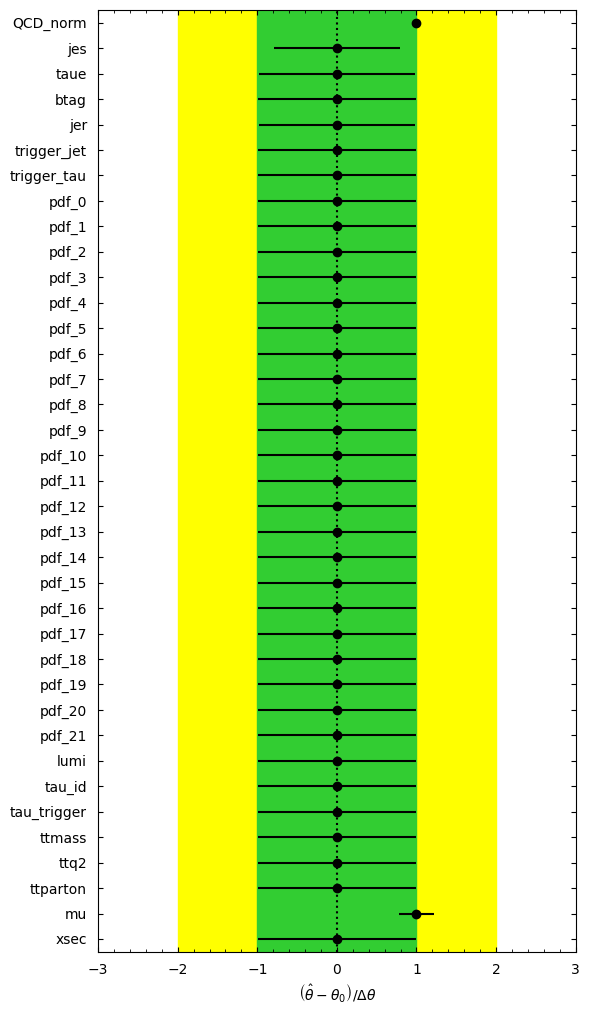

In [37]:
pulls(bce_asimov["bestfit"], bce_asimov["uncertainty"], bce_asimov["labels"])

In [136]:
def correlation_matrix(corr_mat, labels, name="corrmat_all_bce"):
    # rounding for test in CI to match reference
    fig, ax = plt.subplots(
        figsize=(round(5 + len(labels) / 1.6, 1), round(3 + len(labels) / 1.6, 1)),
        dpi=100,
    )
    im = ax.imshow(corr_mat, vmin=-1, vmax=1, cmap="RdBu")

    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels, size=20)
    ax.set_yticklabels(labels, size=20)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
        tick.set_horizontalalignment("right")

    fig.colorbar(im, ax=ax)
    ax.set_aspect("auto")  # to get colorbar aligned with matrix
    fig.set_tight_layout(True)

    # add correlation as text
    for (j, i), corr in np.ndenumerate(corr_mat):
        text_color = "white" if abs(corr_mat[j, i]) > 0.75 else "black"
        if abs(corr) > 0.005:
            ax.text(i, j, f"{corr:.2f}", ha="center", va="center", color=text_color)
    plt.savefig(figure_folder + name + ".pdf", bbox_inches="tight")
    plt.show()

In [137]:
labels = [r"$\mu$", "JES", "JER", "TauE", "PDF", "B-tag", "Trigger"]

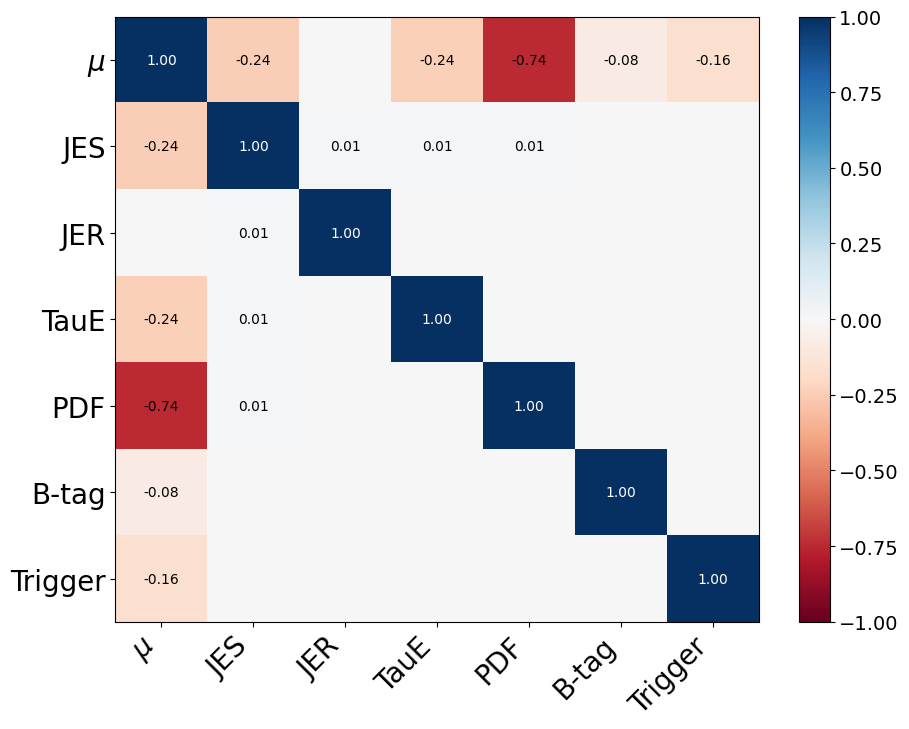

In [138]:
correlation_matrix(bce_asimov["corr_mat"], labels)

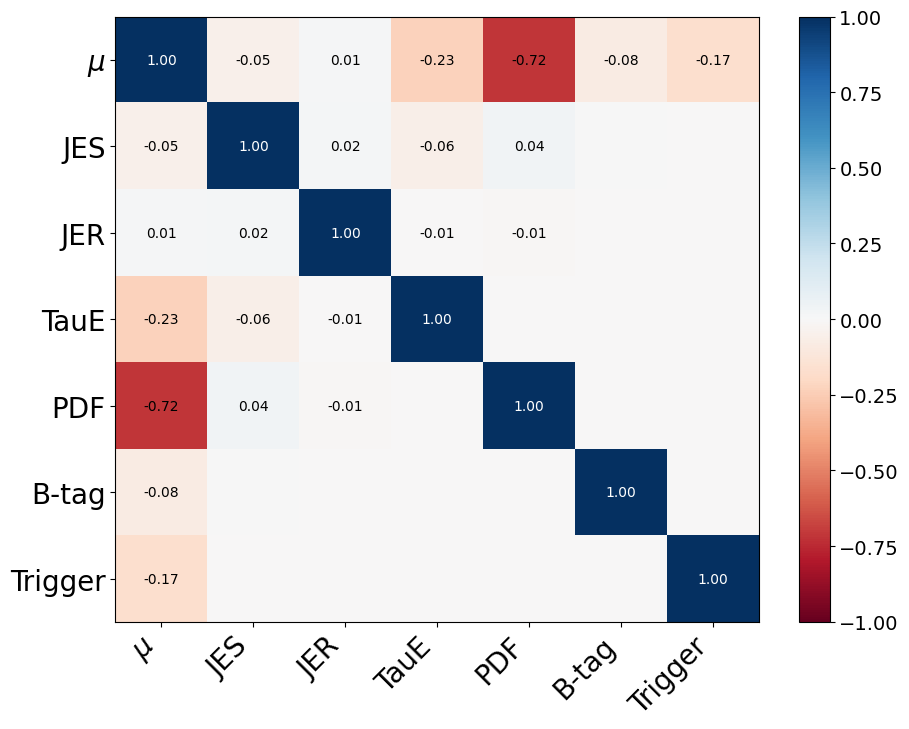

In [139]:
correlation_matrix(inferno_asimov["corr_mat"], labels, name="corrmat_all_inferno")

## Result

In [6]:
import json

In [31]:
basepath = "/home/centos/mount_point/data/artificial_experiments"

with open(basepath + "/optimization_all/run_69/fit_final_all/fit/bce/fit_results.json") as json_file:
    results = json.load(json_file)
    #print(results)
    r_bce = results["bestfit"][-2]
    r_syst_down = results["minos_mu"][0]
    r_syst_up = results["minos_mu"][1]
with open(basepath + "/optimization_all/run_69/fit_final_all/fit/bce/fit_results_stat.json") as json_file:
    results = json.load(json_file)
    #print(results)
    #r_bce = results["bestfit"][-2]
    r_stat_down = results["minos_mu"][0]
    r_stat_up = results["minos_mu"][1]
print(r_bce, r_syst_down, r_syst_up, r_stat_down, r_stat_up)

0.9952811629443317 -0.21170091958868592 0.2630782872949135 -0.08867645208029071 0.0912159838326448


In [44]:
bce_syst_down =  np.sqrt(r_syst_down**2 - r_stat_down**2)
bce_syst_up =  np.sqrt(r_syst_up**2 - r_stat_up**2)

In [52]:
print(r"\mu = 0.99 +" + str(round(bce_syst_up,2)) + " -" + str(round(bce_syst_down,2)) + 
      "~\mathrm{(syst.)} +" + str(round(r_stat_up,2)) + " " + str(round(r_stat_down,2)) + "~\mathrm{(stat.)}")

\mu = 0.99 +0.25 -0.19~\mathrm{(syst.)} +0.09 -0.09~\mathrm{(stat.)}


In [10]:
with open(basepath + "/optimization_all/run_69/fit_final_all/fit/inferno_asimov/fit_results.json") as json_file:
    results = json.load(json_file)
    #print(results)
    r_inf = results["bestfit"][-2]
    r_inf_down = results["minos_mu"][0]
    r_inf_up = results["minos_mu"][1]
with open(basepath + "/optimization_all/run_69/fit_final_all/fit/inferno_asimov/fit_results_stat.json") as json_file:
    results = json.load(json_file)
    #print(results)
    #r_bce = results["bestfit"][-2]
    r_infstat_down = results["minos_mu"][0]
    r_infstat_up = results["minos_mu"][1]
print(r_inf, r_inf_down, r_inf_up, r_infstat_down, r_infstat_up)

1.0000000000335152 -0.1935542443488185 0.24168728905810966 -0.09328189295337781 0.09650347303762731


In [11]:
inf_syst_down =  np.sqrt(r_inf_down**2 - r_infstat_down**2)
inf_syst_up =  np.sqrt(r_inf_up**2 - r_infstat_up**2)

In [12]:
print(r"\mu = 1.02 +" + str(round(inf_syst_up,2)) + " -" + str(round(inf_syst_down,2)) + 
      "~\mathrm{(syst.)} +" + str(round(r_infstat_up,2)) + " " + str(round(r_infstat_down,2)) + "~\mathrm{(stat.)}")

\mu = 1.02 +0.22 -0.17~\mathrm{(syst.)} +0.1 -0.09~\mathrm{(stat.)}


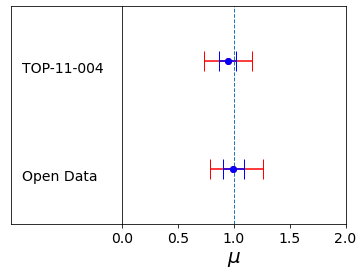

In [34]:
r_orig = 387. / 409.2
r_err = 29. / 387.
r_syst = 0.21 * r_orig
r_tot = np.sqrt((r_err**2 + r_syst**2))


f, (a1, a0) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 2]})
plt.subplots_adjust(wspace=0, hspace=0)
def add_point(x, y, err_x, err_y, color):
    
    asymmetric_error = [[err_x], [err_y]]
    a0.errorbar(x, y, xerr=asymmetric_error, fmt="o", color=color, capsize=10.)
    
add_point(r_orig, 2., r_tot, r_tot, "red")
add_point(r_orig, 2., r_err, r_err, "blue")

add_point(r_bce, 1., abs(r_syst_down), abs(r_syst_up), "red")
add_point(r_bce, 1., abs(r_stat_down), abs(r_stat_up), "blue")

#add_point(df_roofit["TTJets_signal"], 2., df_roofit["TTJets_signal_err"], df_roofit["TTJets_signal_err"], "blue")
#add_point(df_roofit, 2., 0.1, 0.1, "blue")

#add_point(r_syst, 1., err_low_syst, err_high_syst, "red")
#add_point(r_syst, 1., err_low_stat, err_high_stat, "blue")


a0.set_ylim([0.5, 2.5])

a0.set_xlim([0., 2.])
a0.set_yticks([])
a0.set_yticklabels([])
a0.set_xlabel(r"$\mu$", size=20)

a1.set_yticks([])
a1.set_yticklabels([])
a1.set_xticks([])
a1.set_xticklabels([])

a0.text(0.1, 0.75, "TOP-11-004", transform=a1.transAxes, fontsize=14, verticalalignment='top')
a0.text(0.1, 0.25, "Open Data", transform=a1.transAxes, fontsize=14, verticalalignment='top')

a1.set_xlim([0., 22.])
#a1.hlines(1.5, 0., 5.)
#a0.hlines(1.5, 0., 5.)
a0.vlines(1., .5, 3.5, linewidth=1., linestyle="dashed")
f.savefig(figure_folder + "results.pdf", bbox_inches="tight")

In [4]:
r_orig = 387. / 409.2
r_err = 29. / 387.
r_syst = 0.21 * r_orig
r_tot = np.sqrt((r_err**2 + r_syst**2))

In [5]:
r_orig, r_err, r_syst

(0.9457478005865103, 0.07493540051679587, 0.19860703812316716)

## Softhist

In [23]:
path = "/home/centos/mount_point/data/softhist/train/"
cov_bce = np.load(path + "bce/val_cov.npy").squeeze()
inf_bce = np.load(path + "inferno/val_cov.npy").squeeze()

In [66]:
cov_bce

array([[[ 3.2545486e+03, -1.7433855e+01],
        [-1.7433857e+01,  9.2784691e-01]],

       [[ 2.6937043e+03, -1.6732145e+01],
        [-1.6732143e+01,  8.3716851e-01]],

       [[ 2.0727988e+03, -1.6960535e+01],
        [-1.6960535e+01,  8.4035778e-01]],

       [[ 1.7270806e+03, -1.8231276e+01],
        [-1.8231276e+01,  9.3216646e-01]],

       [[ 1.5005131e+03, -1.7972252e+01],
        [-1.7972254e+01,  9.5618790e-01]],

       [[ 1.3260896e+03, -1.7778269e+01],
        [-1.7778269e+01,  9.6698505e-01]],

       [[ 1.1959310e+03, -1.7267376e+01],
        [-1.7267374e+01,  9.6180129e-01]],

       [[ 1.1523320e+03, -1.7661604e+01],
        [-1.7661604e+01,  9.5925176e-01]],

       [[ 1.1457206e+03, -1.8368814e+01],
        [-1.8368814e+01,  9.3966120e-01]],

       [[ 1.1568942e+03, -1.8831829e+01],
        [-1.8831829e+01,  9.3067360e-01]],

       [[ 1.1597551e+03, -1.9302738e+01],
        [-1.9302738e+01,  9.2840606e-01]],

       [[ 1.1825796e+03, -1.9894953e+01],
        [-1.

In [24]:
bkg = pd.read_hdf("/home/centos/mount_point/data/softhist/samples/QCD.h5")
sig = pd.read_hdf("/home/centos/mount_point/data/softhist/samples/TTJets_signal.h5")
val_bkg = bkg[bkg["is_train"]==False]["inferno"]
val_sig = sig[sig["is_train"]==False]["inferno"]

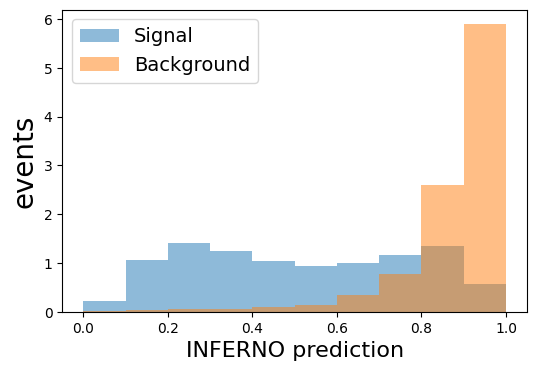

In [25]:
plt.figure(dpi=100)#dpi=150)
plt.hist(val_sig, density=True, alpha=0.5, bins=10, range=[0,1], label="Signal")
plt.hist(val_bkg, density=True, alpha=0.5, bins=10, range=[0,1], label="Background")
plt.xlabel("INFERNO prediction", fontsize=16)
plt.ylabel(r"events", fontsize=20)
plt.legend(loc="upper left", prop={'size': 14})
plt.savefig(figure_folder + "softhist_output.pdf", bbox_inches="tight")

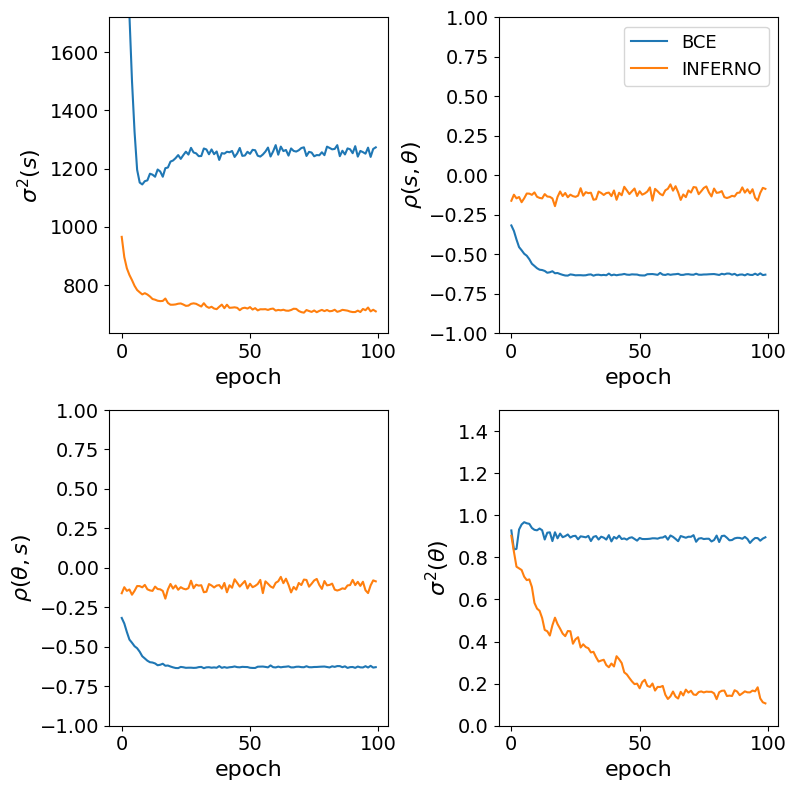

In [30]:
plot_cov_infbce(cov_bce, inf_bce, names = ["s", r"\theta"], stddev=False, name="cov_softhist")

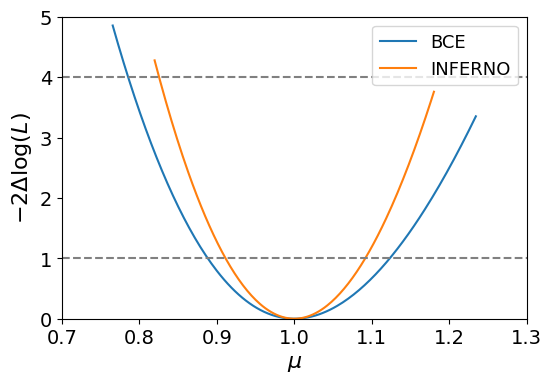

In [68]:
path = "/home/centos/mount_point/data/softhist"
bce_asimov_scan = load_scan( path + "/fit/bce_asimov" )
inferno_asimov_scan = load_scan( path + "/fit/inferno_asimov")
nice_scan(bce_asimov_scan, inferno_asimov_scan, asimov = True, name="sofhist_llscan")

## NoSyst Hists

In [4]:
path = "/home/centos/mount_point/data/artificial_experiments/"
bins_bce = []
bins_inferno = []
bins = [6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40]
for b in bins:
    
    """
    bce_scan = load_scan( path + "bins_nosyst/bin_" + str(b) + "/fit/bce" )["uncertainty"]
    inferno_scan = load_scan( path + "bins_nosyst/bin_" + str(b) + "/fit/inferno" )["uncertainty"]
    """
    with open(path + 'bins_nosyst/bin_' + str(b) + "/fit/bce_asimov/fit_results.json") as json_file:
        bins_bce.append(json.load(json_file)["minos_mu"])
    with open(path + 'bins_nosyst/bin_' + str(b) + "/fit/inferno_asimov/fit_results.json") as json_file:
        bins_inferno.append(json.load(json_file)["minos_mu"])

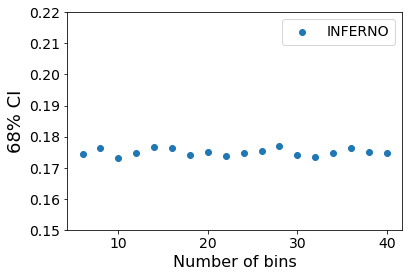

In [9]:
#plt.scatter(np.array(bins), -np.array(bins_bce)[:,0] + np.array(bins_bce)[:,1], label="BCE")
plt.scatter(np.array(bins), -np.array(bins_inferno)[:,0] + np.array(bins_inferno)[:,1], label="INFERNO")
plt.legend(loc="upper right", prop={'size': 14})
plt.xlabel("Number of bins", size=16)
plt.ylabel("68% CI", size=18)
plt.ylim([0.15, 0.22])
plt.savefig(figure_folder + "bins.pdf", bbox_inches="tight")

## Plot error band

In [86]:
path = "/home/centos/mount_point/data/artificial_experiments/"
bce_scans = []
inferno_scans = []
mu_vals_bce = []
mu_vals_inferno = []
for i in range(10):
    bce_scans.append(load_scan( path + "ten_shifts/shift_" + str(i) + "/fit/bce_asimov" )["delta_nlls"])
    mu_vals_bce.append(load_scan( path + "ten_shifts/shift_" + str(i) + "/fit/bce_asimov" )["parameter_values"])
    inferno_scans.append( load_scan( path + "ten_shifts/shift_" + str(i) + "/fit/inferno_asimov" )["delta_nlls"])
    mu_vals_inferno.append(load_scan( path + "ten_shifts/shift_" + str(i) + "/fit/inferno_asimov" )["parameter_values"])

In [87]:
bce_mean = np.array(bce_scans).mean(axis=0)
bce_std = np.array(bce_scans).std(axis=0)
mu_vals_bce = np.array(mu_vals_bce).mean(axis=0)

In [88]:
inferno_mean = np.array(inferno_scans).mean(axis=0)
inferno_std = np.array(inferno_scans).std(axis=0)
mu_vals_inferno = np.array(mu_vals_inferno).mean(axis=0)

In [89]:
mu_vals_inferno

array([0.82072979, 0.82253151, 0.82433322, 0.82613493, 0.82793664,
       0.82973835, 0.83154006, 0.83334177, 0.83514348, 0.83694519,
       0.8387469 , 0.84054862, 0.84235033, 0.84415204, 0.84595375,
       0.84775546, 0.84955717, 0.85135888, 0.85316059, 0.8549623 ,
       0.85676401, 0.85856572, 0.86036744, 0.86216915, 0.86397086,
       0.86577257, 0.86757428, 0.86937599, 0.8711777 , 0.87297941,
       0.87478112, 0.87658283, 0.87838454, 0.88018626, 0.88198797,
       0.88378968, 0.88559139, 0.8873931 , 0.88919481, 0.89099652,
       0.89279823, 0.89459994, 0.89640165, 0.89820337, 0.90000508,
       0.90180679, 0.9036085 , 0.90541021, 0.90721192, 0.90901363,
       0.91081534, 0.91261705, 0.91441876, 0.91622047, 0.91802219,
       0.9198239 , 0.92162561, 0.92342732, 0.92522903, 0.92703074,
       0.92883245, 0.93063416, 0.93243587, 0.93423758, 0.93603929,
       0.93784101, 0.93964272, 0.94144443, 0.94324614, 0.94504785,
       0.94684956, 0.94865127, 0.95045298, 0.95225469, 0.95405

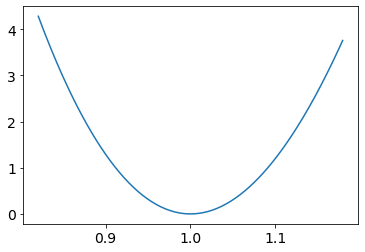

In [91]:
plt.plot(mu_vals_inferno, inferno_mean)

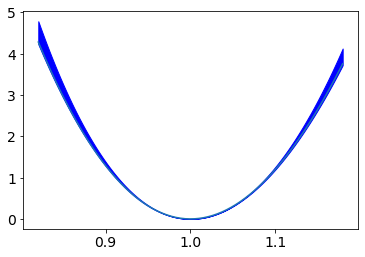

In [99]:
fig, ax = plt.subplots()
ax.plot(mu_vals_inferno, inferno_mean)
ax.fill_between(mu_vals_inferno, (inferno_mean-inferno_std*10), (inferno_mean+inferno_std*100), color='b', alpha=1)

## Copy relevant figures

In [31]:
import os

In [32]:
run_69_dir = "/home/centos/cmsopen/inferno/run_69/"
basepath = "/home/centos/mount_point/data/artificial_experiments/optimization_all/run_69/fit_final_all/fit/"

In [64]:
for d in ["bce", "inferno"]:
    os.system( "cp " + basepath + d + "/correlation_matrix.pdf " + run_69_dir + d + "_correlation_matrix.pdf" )
    os.system( "cp " + basepath + d + "_asimov/correlation_matrix.pdf " + run_69_dir + d + "_asmiov_correlation_matrix.pdf" )   
    os.system( "cp " + basepath + d + "/ranking.pdf " + run_69_dir + d + "_ranking.pdf" )
    os.system( "cp " + basepath + d + "_asimov/ranking.pdf " + run_69_dir + d + "_asmiov_ranking.pdf" )
    

In [141]:
basepath = "/home/centos/mount_point/data/artificial_experiments/optimization_all/run_69/train/inferno/"
for d in ["jes", "jer", "taue"] + ["btag", "trigger", "pdf"]:
    os.system( "cp " + basepath + "shapes_" + d + ".pdf " + run_69_dir + "inferno_shapes_" + d + ".pdf" )    

In [33]:
basepath = "/home/centos/mount_point/data/artificial_experiments/optimization_all/run_69/train/bce/"
for d in ["jes", "jer", "taue"] + ["btag", "trigger", "pdf"]:
    os.system( "cp " + basepath + "shapes_" + d + ".pdf " + run_69_dir + "bce_shapes_" + d + ".pdf" )    

## HP opt

In [4]:
basepath = "/home/centos/mount_point/data/artificial_experiments/"
lr_param = [0.0001, 0.001, 0.01]
neurons_param = [20, 40, 60, 80, 100]
temperature_param = [0.01, 0.1, 0.5, 0.9, 0.99]

hp = []

i_exp = 0
for lr in lr_param:
    for neurons in neurons_param:
        for temp in temperature_param:

            path = basepath + "/optimization_all/run_"+str(i_exp)+"/train/inferno/val_loss.npy" 
            loss = np.load(path)
            try:
                with open(basepath + "/optimization_all/run_"+str(i_exp)+"/fit/inferno_asimov/fit_results.json") as json_file:
                    results = json.load(json_file)["uncertainty"][1]                    
                    hp.append({"lr":lr, "neurons":neurons, "temp":temp, "minloss":np.sqrt(min(loss)), "fit":results})
            except:
                #print(basepath + "optimization_pdftauejes/run_"+str(i)+"/fit/inferno_asimov/fit_results.json")
                hp.append({"lr":lr, "neurons":neurons, "temp":temp, "minloss":np.sqrt(min(loss)), "fit":1000})
            i_exp+=1


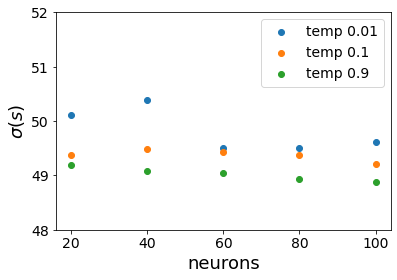

In [5]:
df = pd.DataFrame(hp)
df = df[df["lr"]==0.001]
df0 = df[df["temp"]==0.01]
df1 = df[df["temp"]==0.1]
df2 = df[df["temp"]==0.5]
df3 = df[df["temp"]==0.9]
df4 = df[df["temp"]==0.99]


plt.scatter(df0["neurons"], df0["minloss"], label="temp 0.01")
plt.scatter(df1["neurons"], df1["minloss"], label="temp 0.1")
#plt.scatter(df2["neurons"], df2["minloss"])
plt.scatter(df3["neurons"], df3["minloss"], label="temp 0.9")
#plt.scatter(df4["neurons"], df4["minloss"])
plt.legend(loc="upper right", prop={"size":14})
plt.ylim([48.00, 52])
plt.xlabel("neurons", size=18)
plt.ylabel(r"$\sigma(s)$", size=18)
#plt.ylim([0.15, 0.17])
plt.savefig(figure_folder + "hp.pdf", bbox_inches="tight")

In [124]:
# Compare HP
basepath = "/home/centos/mount_point/data/artificial_experiments/"
fitdir = "optimization_all"#"optimization_pdftauejes"#"optimization_all"
lr_param = [0.0001, 0.001, 0.01]
neurons_param = [20, 40, 60, 80, 100]
temperature_param = [0.01, 0.1, 0.5, 0.9, 0.99]

hp = []

i_exp = 0
for lr in lr_param:
    for neurons in neurons_param:
        for temp in temperature_param:

            path = basepath + "/"+ fitdir +"/run_"+str(i_exp)+"/train/inferno/val_loss.npy" 
            loss = np.load(path)
            try:
                with open(basepath + "/" + fitdir +"/run_"+str(i_exp)+"/fit_complete_bins20/fit/inferno/fit_results.json") as json_file:
                    results_inf = json.load(json_file)["bestfit"][-2]#["minos"]
                    #print(results)
                with open(basepath + "/"+ fitdir +"/run_"+str(i_exp)+"/fit_complete_bins20/fit/bce/fit_results.json") as json_file:
                    results_bce = json.load(json_file)["bestfit"][-2]#["minos"]
                    #print(results)
                hp.append({"lr":lr, "neurons":neurons, "temp":temp, "minloss":np.sqrt(min(loss)), 
                           "fit_inf":results_inf, "fit_bce":results_bce})
            except:
                #print(basepath + "optimization_pdftauejes/run_"+str(i)+"/fit/inferno_asimov/fit_results.json")
                hp.append({"lr":lr, "neurons":neurons, "temp":temp, "minloss":np.sqrt(min(loss)), 
                           "fit_inf":1000, "fit_bce":1000})
            i_exp+=1
